For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

In [246]:
# Import libraries
import my_functions as mf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import env
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [69]:
# Mean number of cars = 2
μ = 2

# Create the poisson distribution
cars_dist = stats.poisson(μ)

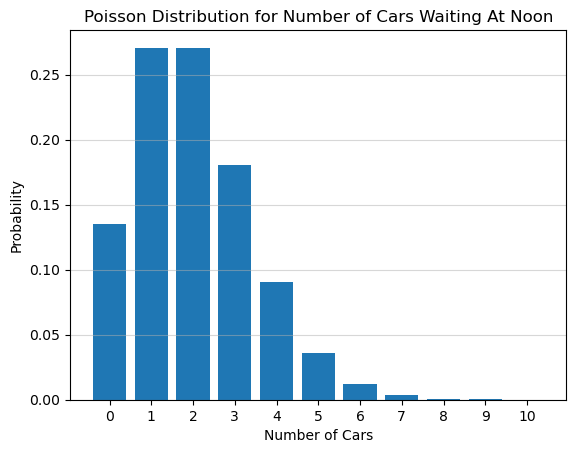

In [79]:
# Set up conditions for plot
domain = np.arange(0,11)
cars_range = [cars_dist.pmf(n) for n in domain]

# Plot the graph
plt.bar(domain,cars_range)
plt.title('Poisson Distribution for Number of Cars Waiting At Noon')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')

# Add features
plt.grid(alpha=0.5,axis='y')
plt.xticks(domain)
plt.yticks()

plt.show()

- What is the probability that no cars drive up in the noon hour?

In [128]:
# Given a distinct value and wanting the probability of specific value
# Poisson uses discrete data, so pmf is the function to use
cars_dist.pmf(0)

0.1353352832366127

- What is the probability that 3 or more cars come through the drive through?

In [248]:
# We have the value, we want probability greater than, so sf is the function to use
# Since sf is exclusive, we need to subtract 1 so that it includes the value we want
cars_dist.sf(2)

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [132]:
# We want probability of 1 or greater, so sf again
# Subtracting 1 and running the calculation with 0, since sf only works with greater than
cars_dist.sf(0)

0.8646647167633873

2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [147]:
# Initalize the values. Gonna be a normal distribution
μ = 3.0
σ = 0.3

# Make the distribution
gpa_dist = stats.norm(μ,σ)

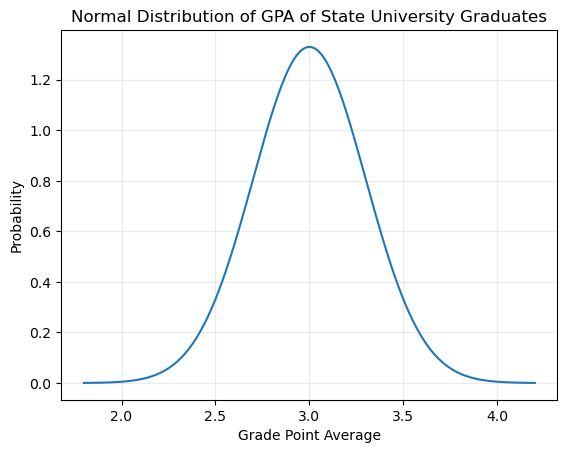

In [188]:
# Make the gpa range
maxish = (σ * 4) + μ
minish = μ - (σ * 4)
domain = np.arange(minish,maxish,0.01)

# This is a continuous distribution, so it's using pdf
gpa_range = [gpa_dist.pdf(n) for n in domain]
plt.plot(domain,gpa_range)
plt.title('Normal Distribution of GPA of State University Graduates')
plt.xlabel('Grade Point Average')
plt.ylabel('Probability')

# Add features
plt.xticks()
plt.grid(alpha=0.25)

plt.show()

- What grade point average is required to be in the top 5% of the graduating class?

In [211]:
# Given a probability, so using isf/ppf
# ppf works with 0.95, isf with 0.05
gpa_dist.isf(0.05)

3.4934560880854417

- What GPA constitutes the bottom 15% of the class?

In [214]:
# Given a probability, so using isf/ppf
# ppf works with 0.15, isf with the inverse
gpa_dist.ppf(0.15)

2.689069983151863

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [234]:
# Using ppf for less than or equal to 30%, which should be the third decile.
# gpa_dist.ppf(0.3)

print(f'''
    The range of the third decile is 0 - {round(gpa_dist.ppf(0.3),2)}.
    
    Accordingly, a student with a GPA of 2.8 would qualify for this scholarship.
''')


    The range of the third decile is 0 - 2.84.
    
    Accordingly, a student with a GPA of 2.8 would qualify for this scholarship.



- If I have a GPA of 3.5, what percentile am I in?

In [250]:
# Make sure I'm calculating things right
# cdf to get the cumulative probability
# gpa_dist.cdf(3.5)

print(f'''
    With a GPA of 3.5, you are in the {round(gpa_dist.cdf(3.5)*100,2)}% percentile.
''')


    With a GPA of 3.5, you are in the 95.22% percentile.



3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [266]:
# Using a binomial function for this
n = 4326 # number of trials
p = 0.02 # Average click-through rate percentage
x = 97 # Random number of successes?

click_thru = stats.binom(n,p)

In [274]:
click_thru.cdf(x)

0.8821846941402147

4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [290]:
# Build the binomial
# n = 100 # number of questions (and trials)
p = round(1/101,2) # probability of success

hw_answers = stats.binom(n,p)

- What is the probability that at least one of your first 60 answers is correct?

In [334]:
n = 60   # Change trials to 60
hw_answers = stats.binom(n,p)

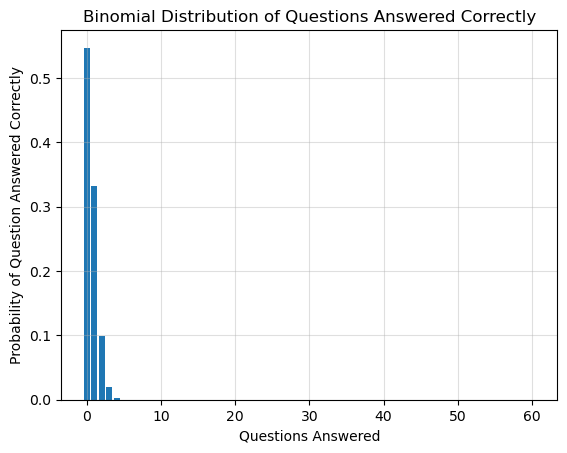

In [373]:
domain = np.arange(0,61)
hw_range = [hw_answers.pmf(n) for n in domain]

plt.bar(domain,hw_range)
plt.title('Binomial Distribution of Questions Answered Correctly')
plt.xlabel('Questions Answered')
plt.ylabel('Probability of Question Answered Correctly')

plt.grid(alpha=0.4)

plt.show()

In [365]:
# Calculate probability
hw_answers.sf(0)

0.45284335760923855

In [375]:
# Probability of getting at least 1 correct
1-((1-p)**n)

0.4528433576092388

5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [391]:
# We'll graph the probability over a week, so x axis = each day of the week
# 3 active cohorts of 22 students = 66 students

# Run the necessary calculations because I'm lazy
cohort_students = 22 # Number of students per cohort
cohorts = 3 # Number of active cohorts
t_students = cohort_students * cohorts # Total number of students
student_cleans = 0.03 # Percent chance any student cleans the break area
ba_students = round(0.90 * t_students) # Number of students visiting break area per day

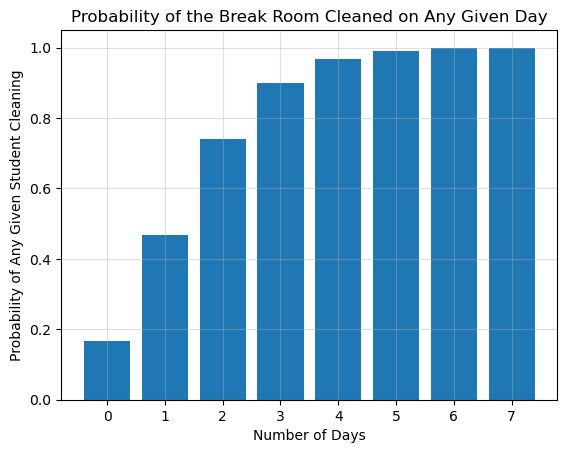

In [431]:
# it should be binomial distribution
cleans_dist = stats.binom(ba_students,student_cleans)

# Range will be 0 - 8 for days of the week
domain = np.arange(0,8)
cleans_range = [cleans_dist.cdf(n) for n in domain]
plt.bar(domain,cleans_range)
plt.title('Probability of the Break Room Cleaned on Any Given Day')
plt.xlabel('Number of Days')
plt.ylabel('Probability of Any Given Student Cleaning')
plt.grid(alpha=0.4)

plt.show()

In [423]:
cleans_dist.sf(0)

0.8342199288437352

6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

7. Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

    1. What percent of employees earn less than 60,000?

    2. What percent of employees earn more than 95,000?

    3. What percent of employees earn between 65,000 and 80,000?

    4. What do the top 5% of employees make?
    
    **Hint** If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your `.gitignore`, your `env.py`, and to use `pd.read_sql`. Copy over your `.gitignore` and `env.py` from your data science libraries exercises folder, and connect to the employees database like so:
    
    `import pandas as pd
    import env
    
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'  
    pd.read_sql('SELECT * FROM departments', url)`